In [188]:
import pandas as pd

In [189]:
url ='https://docs.google.com/spreadsheets/d/1iYHApNr4LjZWybk2O5tKI4NgxQX_0mG0j-KXId2r47A/export?format=csv&gid=0'
df = pd.read_csv(url)
df['Subjects (max 3 items)']= df['Subjects (max 3 items)'].str.lower()

In [190]:
df

,Name,Surname,Subjects (max 3 items),City,Country,Can help with (max 3 items)
0,Francesco,Turci,"disordered systems, soft matter, computational...",Bristol,UK,"editing, IT support, graphics"
1,Gianni,Petrella,"mathematics, physics, computer science",Brussels,BE,"IT support and maintenance, AI, statistics"
2,Emanuele,Penocchio,"physical chemistry, thermodynamics",Luxembourg,LU,"Festivaletteratura, organization, discussion o..."
3,Fulvio,Paleari,"condensed matter, solid state, computational p...",Roma,IT,"editing, content discussion and production"
4,Riccardo,Impavido,"physics, mathematics, philosophy",Padova,IT,"Writing, workshops"
5,Lavinia,Marziale,"mathematics, computer science, linguistics",Montpellier,FR,"IT support, artistic experiments"
6,Maria Elena,Antinori,"biotechnology, microorganisms",Genova,IT,"workshops, interviews"
7,Elena Alma,Rastello,"book publishing, literature, linguistics",Torino,IT,"communication, discussion of contents"
8,Sara,Dal Cengio,"physics, chemistry",Barcelona,ES,"radio and podcasts, interviews"
9,Danilo,Forastiere,"physical chemistry, thermodynamics",Luxembourg,LU,IT support and maintenance


In [191]:
subj = df['Subjects (max 3 items)']
all_subjs = [s.split(',') for s in subj]
all_subjs = [s.strip() for l in all_subjs for s in l]
all_subjs = " ".join([s.replace(' ', '_').lower() for s in all_subjs])

In [192]:
all_subjs

'disordered_systems soft_matter computational_physics mathematics physics computer_science physical_chemistry thermodynamics condensed_matter solid_state computational_physics physics mathematics philosophy mathematics computer_science linguistics biotechnology microorganisms book_publishing literature linguistics physics chemistry physical_chemistry thermodynamics scientific_communication literature linguistics mathematics philosophy graphics visual_arts thermodynamics disordered_systems'

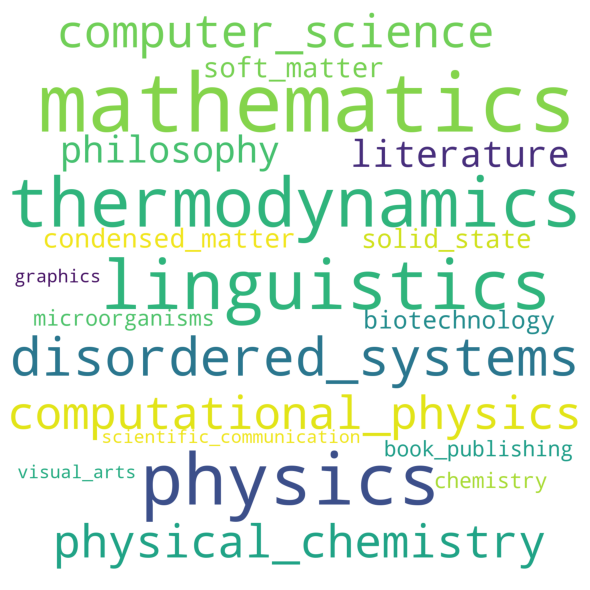

In [193]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 1600, height = 1600, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(all_subjs) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 


In [194]:
import collections

In [195]:
counts = collections.Counter(all_subjs.split())
counts

Counter({'biotechnology': 1,
         'book_publishing': 1,
         'chemistry': 1,
         'computational_physics': 2,
         'computer_science': 2,
         'condensed_matter': 1,
         'disordered_systems': 2,
         'graphics': 1,
         'linguistics': 3,
         'literature': 2,
         'mathematics': 4,
         'microorganisms': 1,
         'philosophy': 2,
         'physical_chemistry': 2,
         'physics': 3,
         'scientific_communication': 1,
         'soft_matter': 1,
         'solid_state': 1,
         'thermodynamics': 3,
         'visual_arts': 1})

In [218]:
topics = counts.keys()
net = {}
import networkx as nx
G = nx.Graph()

# connections['Surname'] = df['Surname']
for t in topics:
  G.add_node(t)
  test = df['Subjects (max 3 items)'].str.contains(t.replace("_"," "))
  for p in df['Surname'][test]:
    connections = df['Subjects (max 3 items)'][df['Surname']==p].iloc[0].split(',')

    for c in connections:
      c = c.strip()
      key = c.replace(' ','_')
      if key != t:
        G.add_edge(t,key,name=p)


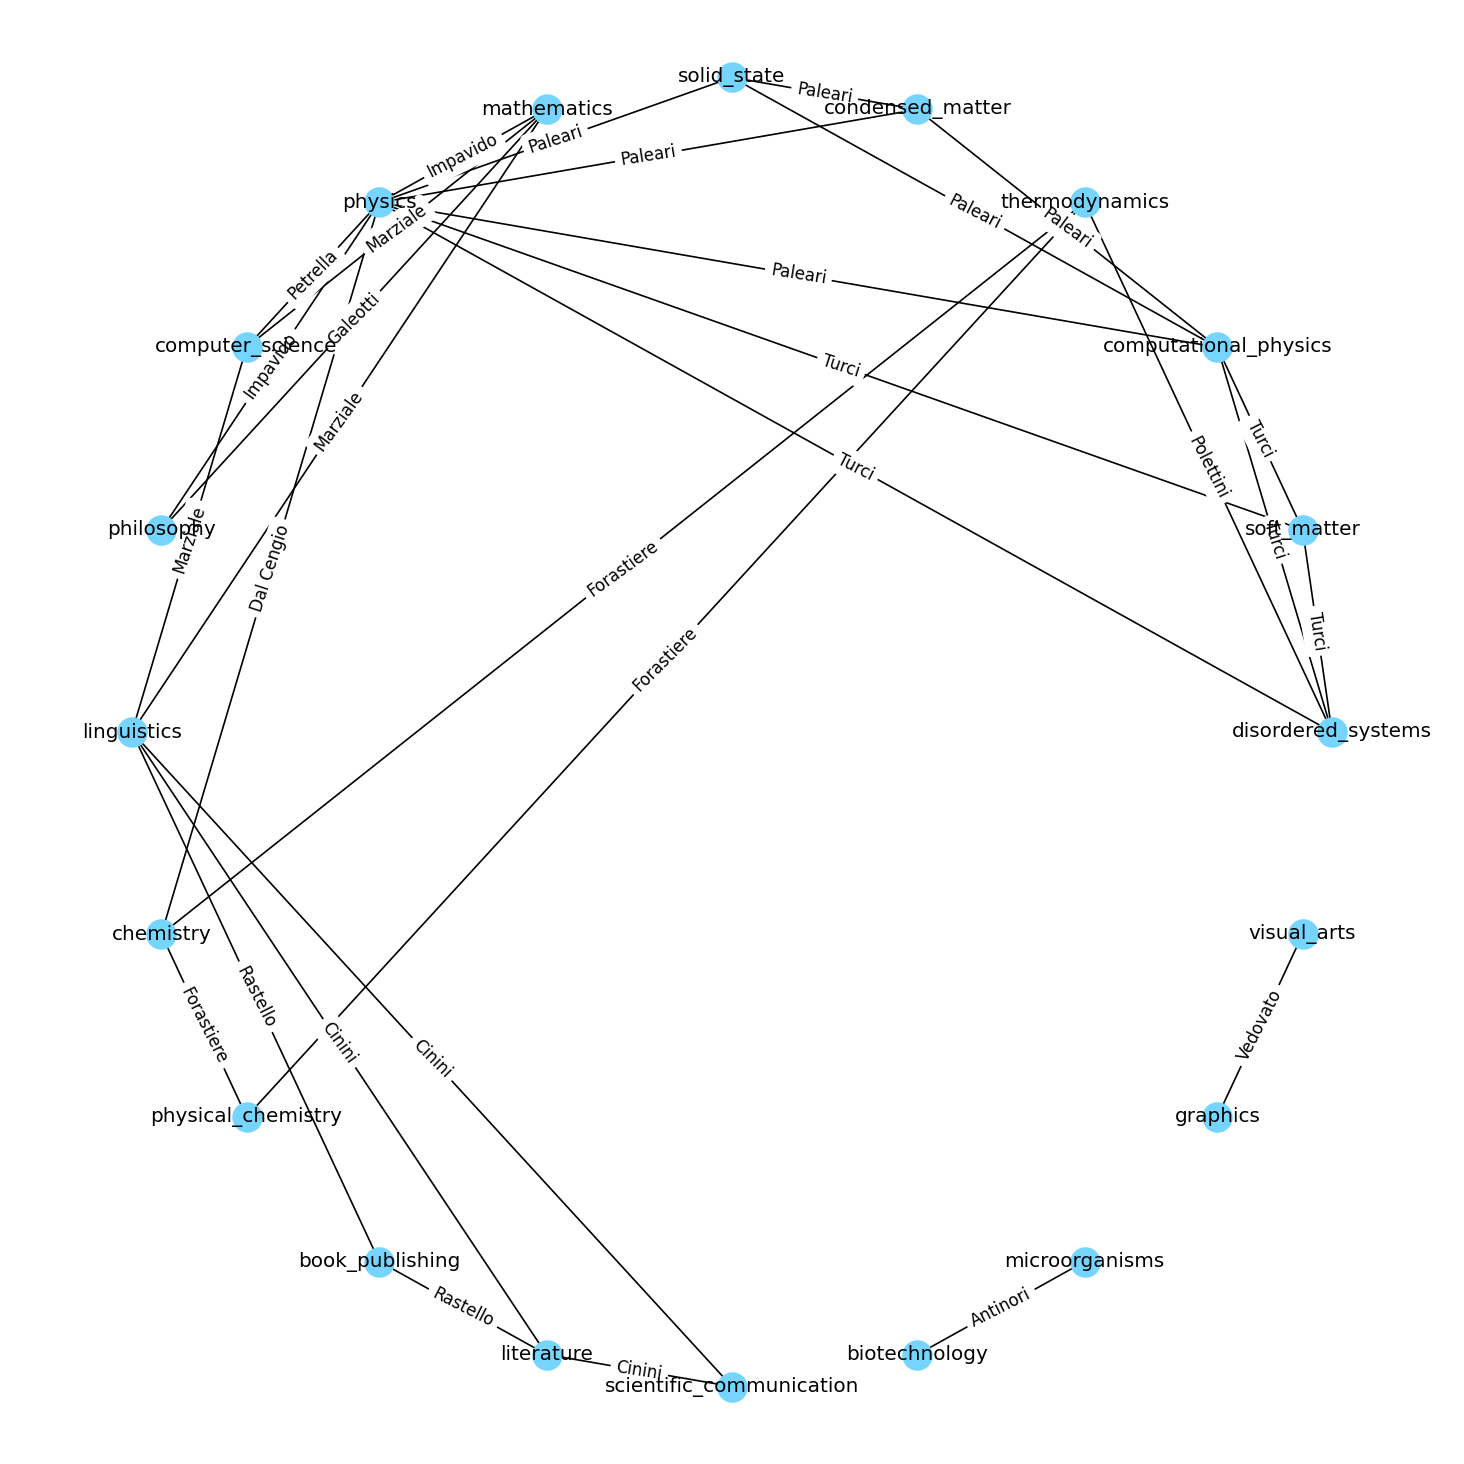

In [241]:
plt.figure(figsize=(12,12),dpi=120)
pos=nx.shell_layout(G)
nx.draw(G,pos=pos, with_labels=True, node_color='#75d5ff')
nx.draw_networkx_edge_labels(G,pos=pos, edge_labels=nx.get_edge_attributes(G,'name'));
xs = [xx for xx,yy in pos.values()]
plt.xlim(1.2*min(xs),1.2*max(xs));